In [2]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
#read file
sales_byy=pd.read_csv('Coffee_company.csv', index_col=0)

In [ ]:
#check columns
sales_byy.columns

In [4]:
#clean data
sales_byy.columns=sales_byy.columns.str.replace(' ', '')

In [ ]:
#check
sales_byy.head()

In [6]:
#check the sales column and date column data type
print(sales_byy['Sales'].dtype, sales_byy['Date'].dtype)

object object


In [5]:
#additional cleaning
sales_byy['Sales']=sales_byy['Sales'].str.replace('$','').str.replace(',','')

In [6]:
#check profit data type and clean it
sales_byy['Profit'].astype(str)
sales_byy['Profit']=sales_byy['Profit'].str.replace('$', '').str.replace(',', '')

In [ ]:
#change it to numeric
sales_byy['Sales']=pd.to_numeric(sales_byy['Sales'], errors='coerce')
sales_byy['Profit']=pd.to_numeric(sales_byy['Profit'], errors='coerce')
#check data
sales_byy[['Sales', 'Profit']].head()

In [ ]:
#clean and format the date
#clean the data, replace the / with -
sales_byy['Date']=sales_byy['Date'].str.replace('/', '-')
sales_byy['Date']=pd.to_datetime(sales_byy['Date'], format='%d-%m-%Y')
#check the data
sales_byy['Date'].head()

In [9]:
#transform the date to quarters
sales_byy['Date']=sales_byy['Date'].dt.to_period('Q')

In [38]:
#group the sales and profit by date and sum them up
g_y=sales_byy.groupby('Date')[['Sales', 'Profit']].sum()
#add a new column
g_y['Cost in % Points'] = (g_y['Sales'] - g_y['Profit']) / g_y['Sales']
g_y.head()

,Sales,Profit,Cost in % Points
Date,,,
2021Q1,25339798.91,2735214.20,0.892059
2021Q2,29502044.05,3350652.21,0.886426
2021Q3,26476111.84,2863304.35,0.891853
2021Q4,38686468.77,4621050.77,0.880551
2022Q1,17737859.24,1914649.92,0.892059


## Cost Efficiency in relation to Sales by Quarters

C:\Users\const\AppData\Local\Temp\ipykernel_27032\694488105.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x_indexes[i] - width, g_y['Sales'][i] + max(g_y['Sales'])*0.01, f'{g_y['Cost in Percentage Points'][i]:.2f}',


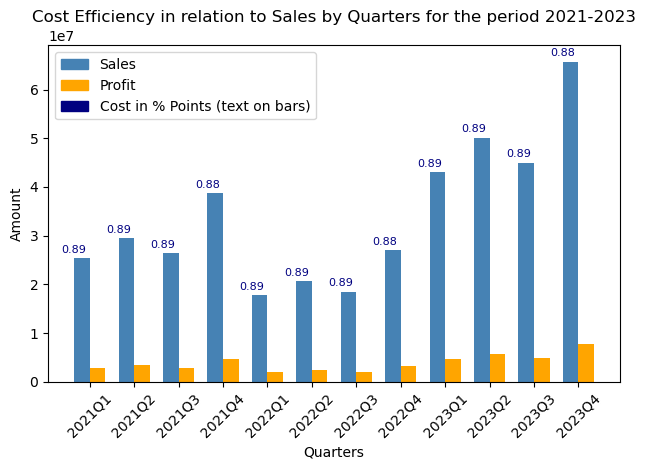

In [ ]:
#plot sales and profit and add labels with the associated cost in percentage points
from matplotlib.patches import Patch

width = 0.35
x_indexes = np.arange(len(g_y.index))

plt.bar(x_indexes - width/2, g_y['Sales'], width=width, label='Sales', color='steelblue')
plt.bar(x_indexes + width/2, g_y['Profit'], width=width, label='Profit', color='orange')
for i in range(len(g_y.index)):
    plt.text(x_indexes[i] - width, g_y['Sales'][i] + max(g_y['Sales'])*0.01, f'{g_y['Cost in Percentage Points'][i]:.2f}', 
             ha='center', va='bottom', fontsize=8, label='Cost in Percentage Points', color='navy')

plt.xticks(x_indexes, g_y.index, rotation=45)
plt.xlabel('Quarters')
plt.ylabel('Amount')
plt.title('Cost Efficiency in relation to Sales by Quarters for the period 2021-2023')

# Add custom legend for the text label
text_patch = Patch(color='navy', label='Cost in % Points (text on bars)')
plt.legend(handles=[plt.Rectangle((0,0),1,1, color='steelblue', label='Sales'),
                    plt.Rectangle((0,0),1,1, color='orange', label='Profit'),
                    text_patch])
plt.tight_layout()
plt.show()